In [38]:
import pandas as pd
from datetime import date
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [39]:
df = pd.read_csv('data/bfro_reports_geocoded.csv')

In [40]:
df.head()

,index,observed,location_details,county,state,season,title,latitude,longitude,date,...,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
0,0,I was canoeing on the Sipsey river in Alabama....,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ed L. was salmon fishing with a companion in P...,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"While attending U.R.I in the Fall of 1974,I wo...","Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,1974-09-20,...,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92
3,3,"Hello, My name is Doug and though I am very re...",I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,It was May 1984. Two friends and I were up in ...,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


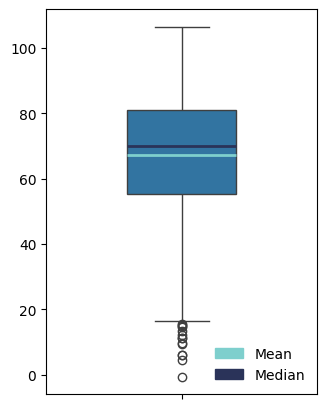

In [43]:
def get_boxplot(df, feauture):

  f = plt.figure() 
  f.set_figwidth(3.5) 
  f.set_figheight(5) 

  this_df = df[feauture]
  this_df.dropna(inplace=True)
  sns.boxplot(
    y=this_df.to_numpy(),
    showmeans=True,
    width=0.4,
    meanline=True,
    meanprops={'color': '#7ecfcd', 'ls': '-', 'lw': 2},
    medianprops={'color': '#2a3359', 'ls': '-', 'lw': 2},
  )
  
  mean_patch = mpatches.Patch(color='#7ecfcd', label='Mean')
  median_patch = mpatches.Patch(color='#2a3359', label='Median')
  plt.legend(handles=[mean_patch, median_patch], loc='lower right', frameon=False)

  plt.show()

get_boxplot(df, "temperature_high")

def get_mean():
  

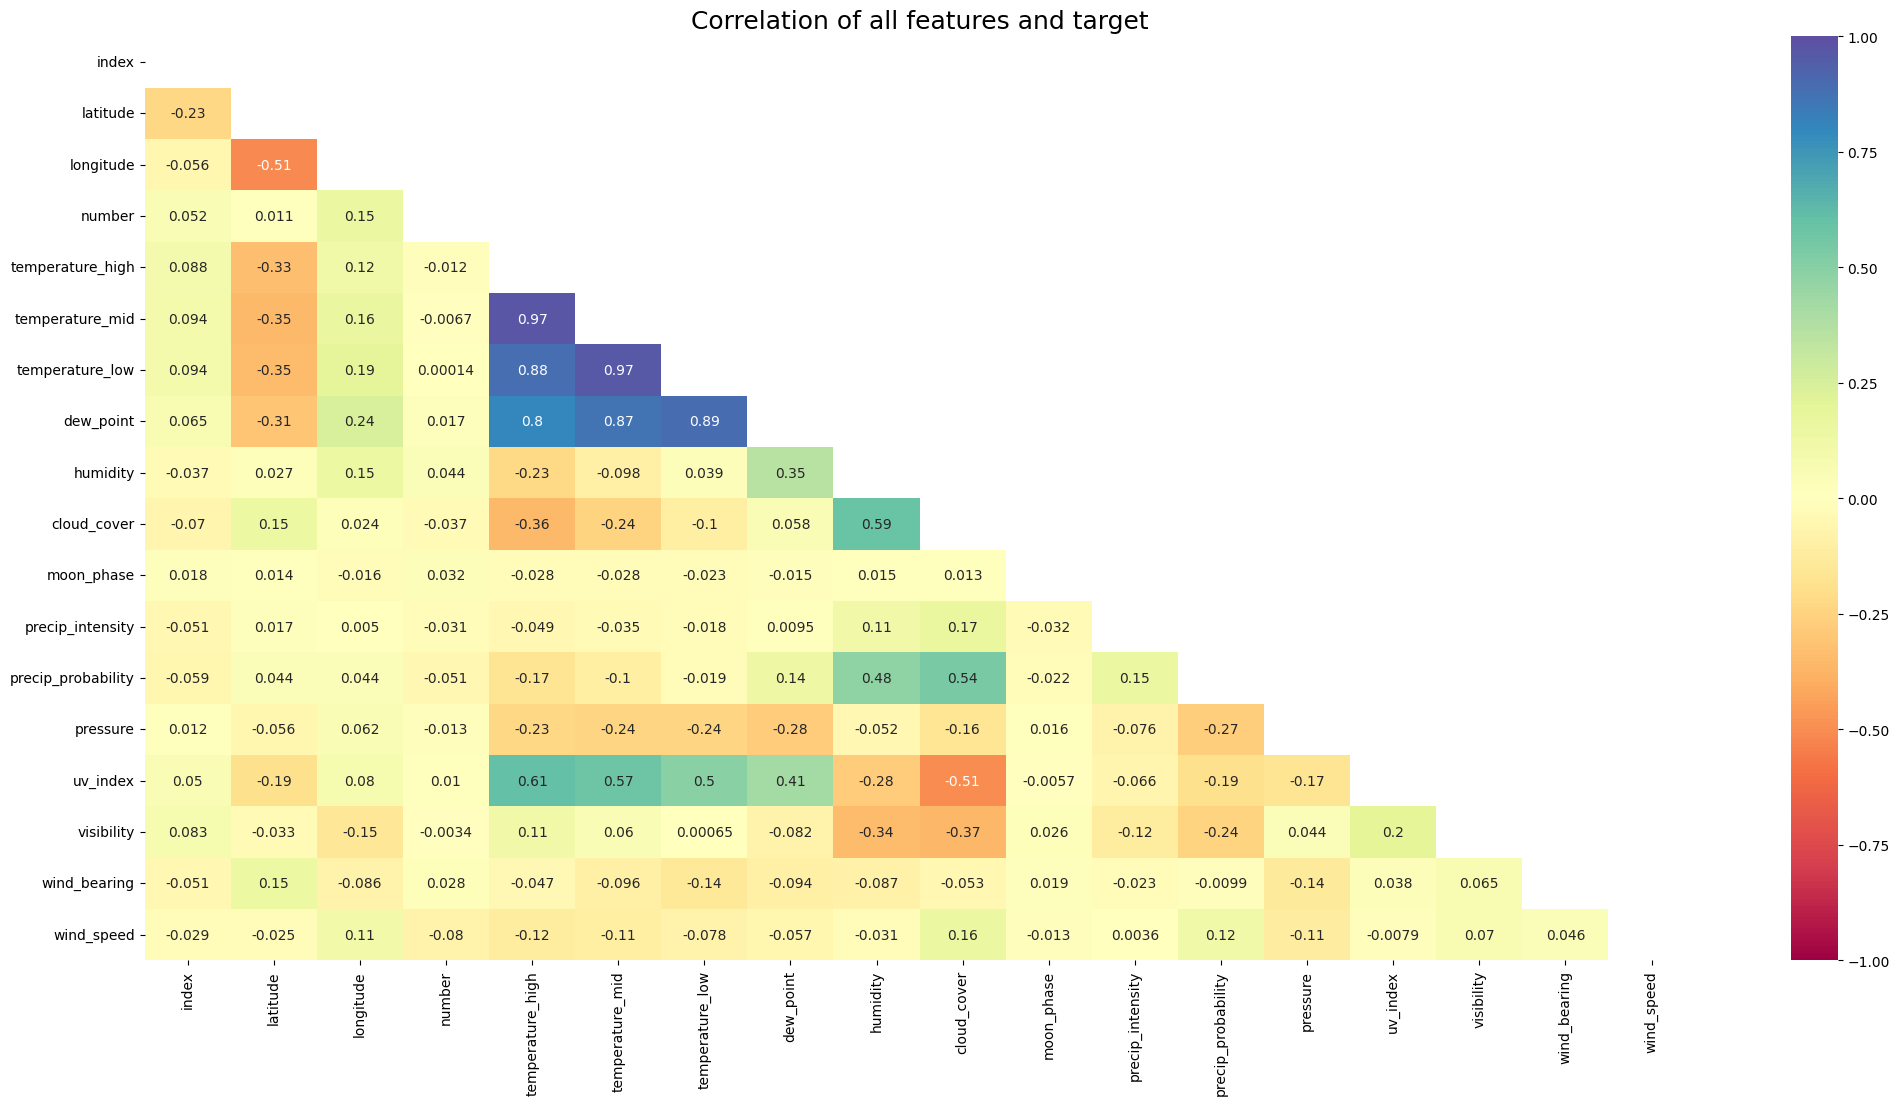

In [42]:
plt.figure(figsize = (25,12))

corr = df.corr(numeric_only = True)
upper_triangle = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,vmin = -1, vmax = 1, cmap = "Spectral", annot = True, mask = upper_triangle)
plt.title("Correlation of all features and target", fontsize= 18)
plt.show()